### Import Helper Libraries 

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.cluster import KMeans

In [59]:
warnings.filterwarnings('ignore')

In [60]:
sns.set_theme(context = 'paper' , style = 'whitegrid' , palette = 'Set1' , 
             rc = {'figure.figsize' : (8 , 4)})

In [61]:
%matplotlib inline 

In [62]:
df = pd.read_csv('Iris.csv')

### Drop ID & Target (this is unsupervised Problem (Clustring))

In [63]:
df.drop(['Species' , 'Id'] , inplace = True , axis = 1)

### Check data info for missing records and show feature data types 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### No null values 

In [65]:
df.isnull().mean()*100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
dtype: float64

### There are 3 duplicated records 
* Drop them 

In [66]:
df.duplicated().sum()

3

In [67]:
df.drop_duplicates(inplace = True , ignore_index = True)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

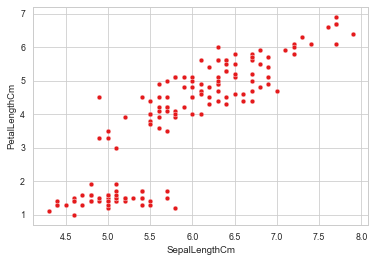

In [68]:
sns.scatterplot(data = df , x = df['SepalLengthCm'] , y = df['PetalLengthCm'])

### Show correlation between features 

<AxesSubplot:>

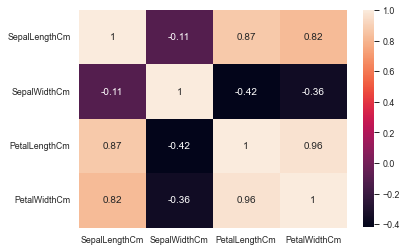

In [69]:
sns.heatmap(df.corr() , annot = True)

In [70]:
wcss = []

### Try K-Means with different number of clusters 

In [71]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df.values)
    wcss.append(kmeans.inertia_)

<AxesSubplot:>

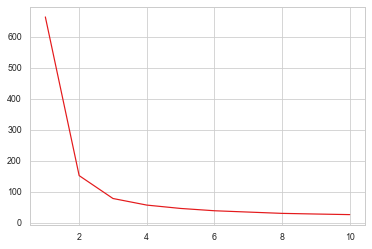

In [72]:
sns.lineplot(x = range(1 , 11) , y = wcss)

### Apply K-Means with 3 clusters 

In [73]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [74]:
y_kmeans = kmeans.fit_predict(df.values)

### Show our cluster 

<AxesSubplot:>

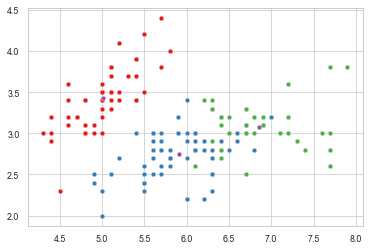

In [75]:
sns.scatterplot(df.values[y_kmeans == 0, 0], df.values[y_kmeans == 0, 1],markers = '-')
sns.scatterplot(df.values[y_kmeans == 1, 0], df.values[y_kmeans == 1, 1])
sns.scatterplot(df.values[y_kmeans == 2, 0], df.values[y_kmeans == 2, 1])
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1])